<a href="https://colab.research.google.com/github/francescodonato/francescodonato.github.io/blob/master/SAHD/SAHD_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# South African Heart Disease Dataset Analysis
## Exploratory Data Analysis and PCA

This _GROUP_ project is a part of the 02450 course Introduction to Machine Learning and Data mining at DTU.

The following text is divided into three parts: 
 
First, the chosen data set is described and some previous work on it outlined.

Next, the attributes in the data set are thoroughly analysed and some elementary statistics presented. 

The final part of the project is to implement Principal Component Analysis on the data set and attempt to interpret the relation between the Principal Components and attributes.

In [9]:
#pkgs
import pandas as pd
import numpy as np

from scipy import stats

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import decomposition

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
#data manipulation
url="http://www.web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data"
data = pd.read_csv(url) #read file

data.drop(data.columns[0], axis=1, inplace=True) #drop first column(index)

#replace variable with binary representation
dictionary = dict(zip(sorted(data["famhist"].unique()), [0,1])) 
data["famhist"].replace(dictionary, inplace=True)

#split
target = data["chd"].copy()
dataset = data.drop("chd", axis=1).copy()

## Exploratory Data Analysis
The data source chosen for this project is from the CORIS baseline study by Rossouw et al., 1983 [1]. This study took place in three rural communities in South Africa and looked at the intensity of high-risk factors in 15 to 64 year old
males for developing coronary disease. The motivation for the study was the indication of a high risk of heart disease within the prominently white, male and Afrikaans-speaking population of these communities.

The data set used is obtained from the book by Tibshirani et al., 2009 [6]. This is extensively used in the literature, as the Heart Disease (HD) is considered an important and serious illness, many works focus on the prediction or the extraction of risk factors Babic et al., 2017 [3].

There are a total of 10 attributes and the data set includes $N = 463$ observations.

  No.    | Attribute description                              | Abbrev.
  -------| ---------------------------------------------------| -------------
  $x_1$  | Systolic blood pressure                            | `sbp`
  $x_2$  | Cumulative tobacco (kg)                            | `tobacco`
  $x_3$  | Low density lipoprotein cholesterol                | `ldl`
  $x_4$  | Adiposity                                          | `adiposity`
  $x_5$  | Family history of heart disease (Present, Absent)  | `famhist`
  $x_6$  | Type-A behavior                                    | `typea`
  $x_7$  | Obesity                                            | `obesity`
  $x_8$  | Current alcohol consumption                        | `alcohol`
  $x_9$  | Age at onset                                       | `age`
  $y$    | Response, coronary heart disease                   | `chd`


The $y$ response attribute is in this case the
dependent variable, i.e. whether the observation (or subject) has
coronary heart disease or not. The other attributes in the table are
thus the variables or *risk factors* which could indicate that there is
an elevated risk (higher probability) of developing coronary heart
disease.

The goal of the following analysis is to investigate the correlation
between the attributes, their contribution to the total variation and
whether the dimensions of the data set can be reduced. The method used
for this is the Principal Component Analysis (PCA). 

This include looking
at the coefficients of the principal components (PCs) and the variance
explained by each of them, including an interpretation of the PCs
directions. Also, the PCA can often handle multi-collinearity, which can
be a problem in prediction, i.e. whether the assumed independent
variables are in fact strongly correlated.

A shortlist of relevant papers (most citation) were extracted from
google scholar, all the following papers show advanced technique of
Machine Learning used for both prediction and classification: In
Babic et al., 2017 [3] is presented a predictive analysis using Decision
Trees, Naive Bayes, SVM (Support Vector Machine) and Neural Network. The
authors first investigate the relationship between the family history
and the actual response for HD, finding that there is a chance of
positive diagnosis around 50% if the disease is recurrent in the family;
after using an oversampling method to resolve the problem of unbalanced
data, they proceed to perform 2 statistical tests for the assumption of
normality (Shapiro-Wilks and Mann-Whitney-Wilcoxon) leading to the
exclusion of the feature “`typea`” and “`alcohol`” for the subsequent
prediction work. 

The publication Gorzalczany and Rudzinski, 2017 [4], is an example of classification problem which goal is to support the diagnose. Their work focuses on multi-object optimization-based fuzzy classifier comparing their implementation with similar optimization algorithm such as SPEA2(3) Strenght Pareto Evolutionary Algorithm 2 (and the
generalization 3) and NSGA-II Nondominated Sorting Genetic Algorithm. 

In Han et al., 2006 [5], a feature extraction problem is solved utilizing the
Partial Least Square (PLS) model. The author claim that this model is a
better Principal Component Analysis (PCA) whose main difference that the
basic vector is not an a set of orthogonal directions (as in PCA) but a
set of conjugant gradient vectors to the correlation matrix; the result
is that the latent variable `alchol` and  `sbp` are the least
important feature on the data set according to their variable importance
metric. 

In the original study by Rossouw et al., 1983 [1], which used a larger data set
, no relevant ML tools are used in the statistical
analysis. 

Finally, in the book Tibshirani et al., 2009 [6] the data set is used
to discuss an example of logistic-regression model fitted by maximum
likelihood, then a more in depth analysis is performed on the
contribution of the features: some variables were excluded from the
linear model because their relationship is non linear, result of the
measurement bias (retrospective data, so measurement performed after the
patients suffered a heart attack, or already benefiting from a healthier
lifestyle). 


In [11]:
#data exploration
pd.pandas.set_option('display.max_columns', None)
print(data.describe().round(2)) #statistic summary 




          sbp  tobacco     ldl  adiposity  famhist   typea  obesity  alcohol  \
count  462.00   462.00  462.00     462.00   462.00  462.00   462.00   462.00   
mean   138.33     3.64    4.74      25.41     0.42   53.10    26.04    17.04   
std     20.50     4.59    2.07       7.78     0.49    9.82     4.21    24.48   
min    101.00     0.00    0.98       6.74     0.00   13.00    14.70     0.00   
25%    124.00     0.05    3.28      19.77     0.00   47.00    22.98     0.51   
50%    134.00     2.00    4.34      26.12     0.00   53.00    25.80     7.51   
75%    148.00     5.50    5.79      31.23     1.00   60.00    28.50    23.89   
max    218.00    31.20   15.33      42.49     1.00   78.00    46.58   147.19   

          age     chd  
count  462.00  462.00  
mean    42.82    0.35  
std     14.61    0.48  
min     15.00    0.00  
25%     31.00    0.00  
50%     45.00    0.00  
75%     55.00    1.00  
max     64.00    1.00  


The printed table gives an overview of the data. It has a total of 463 entries of 10 features each. No values are missing or corrupted.

Systolic blood pressure is measured with medical equipment by trained personnel (Rossouw et al., 1983). 

The Tobacco consumption is the cumulative sum of intake of a person.

Low density lipoprotein cholesterol is a measurement of concentration in the blood from blood samples. 
 
Both adiposity and obesity are two ways of describing amount of body fat.

Family history is a boolean attribute describing whether or not the
participant has had any family with heart heart disease.

Through a behavior-test all participants were given a type-a
score. This is a characterization of an excessive competitive drive, impatience and anger/hostility.


Alcohol is the amount of pure alcohol consumed by a participant in one year. 

Age is simply the age of an participant.


The last attribute is chd which stands for coronary heart disease. This boolean feature was either Present or Absent which is now computed as binary variable(0 and 1).

Worth noting is the maximum alcohol consumption. As the units are given as Litres per year of 100% pure alcohol it would mean one litres of 40%
spirit per day. That amount could be plausible, but it is arguably an outlier. Given that the standard deviation is 24.48 and the mean 17 it can be observed that the distance from mean to max is above 5 standard deviations.

For reference the median value for alcohol is 7.51 which may be more informative of the data in this case. 


In [12]:
#Numpy 
m,n = dataset.shape
X = dataset.to_numpy().copy()
y = target.to_numpy().copy()

#standardization

#https://stats.stackexchange.com/questions/297975/when-doing-pca-on-binary-variables-should-i-scale-them

scaler = preprocessing.StandardScaler() 
scaler.fit(X) 
X_pre = scaler.transform(X)

#violin plot standardized
std_dataset = pd.DataFrame(X_pre)
std_dataset.columns = dataset.columns
std_dataset

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969


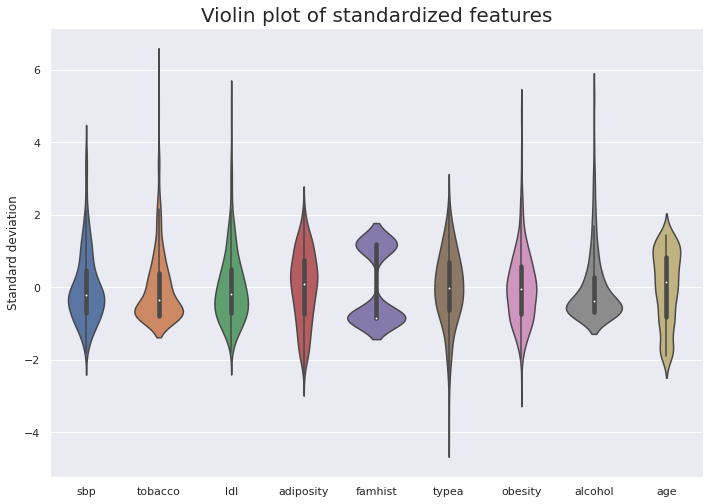

In [13]:
#plot
d=sns.violinplot(data=std_dataset)
d.set_title("Violin plot of standardized features", size=20)
d.set_ylabel("Standard deviation")
d

above there is a graphic visualization of the data. A reason for
visualizing with the violin plot instead of a boxplot is the inclusion of the  density. Like in a boxplot the the white marker represents the median and the vertical bar surrounding it amount to the 25 and 75 percentile. Each violin represent an attribute. 

One can see clearly the outlier present in the tobacco column as height of that violin is longer than any other, as well as the other outliers mentioned in the previous section.

Text(0.5, 1.02, 'PairPlot: Scatter, Distribution and Countour ')

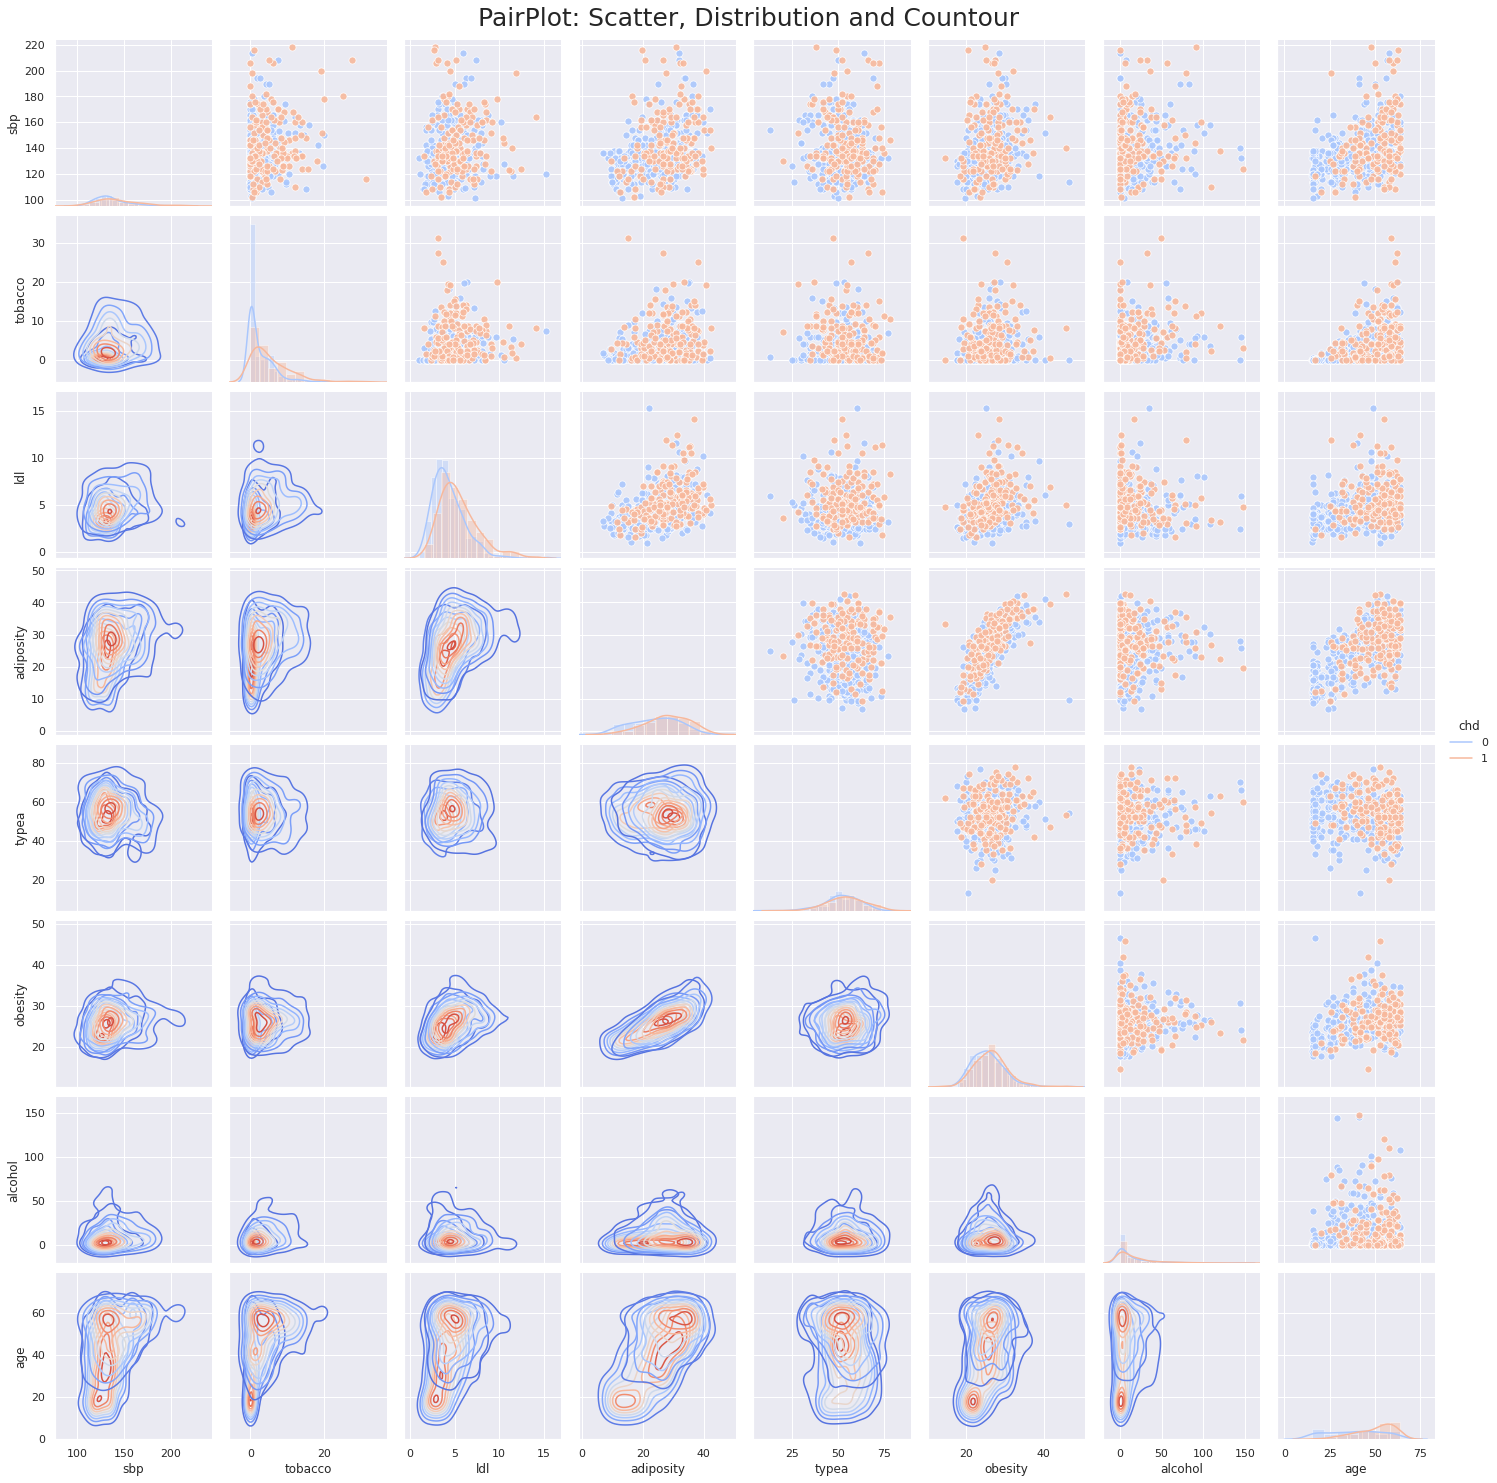

In [14]:
#sns.pairplot(data.drop("famhist", axis=1),  diag_kind="kde", corner=True, hue="chd", markers=["o", "s"])

g = sns.PairGrid(data.drop("famhist", axis=1), hue="chd", palette="coolwarm")
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=50, alpha=0.9)
g = g.map_lower(sns.kdeplot, cmap="coolwarm")
g = g.map_diag(sns.distplot)
g = g.add_legend()
g = g.fig.suptitle("PairPlot: Scatter, Distribution and Countour ", y= 1.02, size=25)

g
# WARNINGS -> https://github.com/mwaskom/seaborn/issues/1489

In the scatter matrix a visualization of the relationships between each pair of
variables is observed. For the whole plot orange is used to indicate the presence of chd and blue the contrary. 

Obtaining a graphic representation of the correlation is important due to only looking at an correlation coefficient can in some cases be misleading (i.e. in case of a relatively low sample size containing many outliers the coefficient can be misrepresentative from the dataset).

 Further observation of the plot the most distinct positive correlation is between adioposity and obesity, which also intuitively makes sense given they both measure body fat. The diagonal plots represents the variables univariate distribution and an interesting observation is made from the age distribution. A clear trend is that older people more often have chd, which also appears natural.

And the lower left triangle plots are a kernel density estimation by contour plots visualizing the bivariate distribution between the respective variables. 

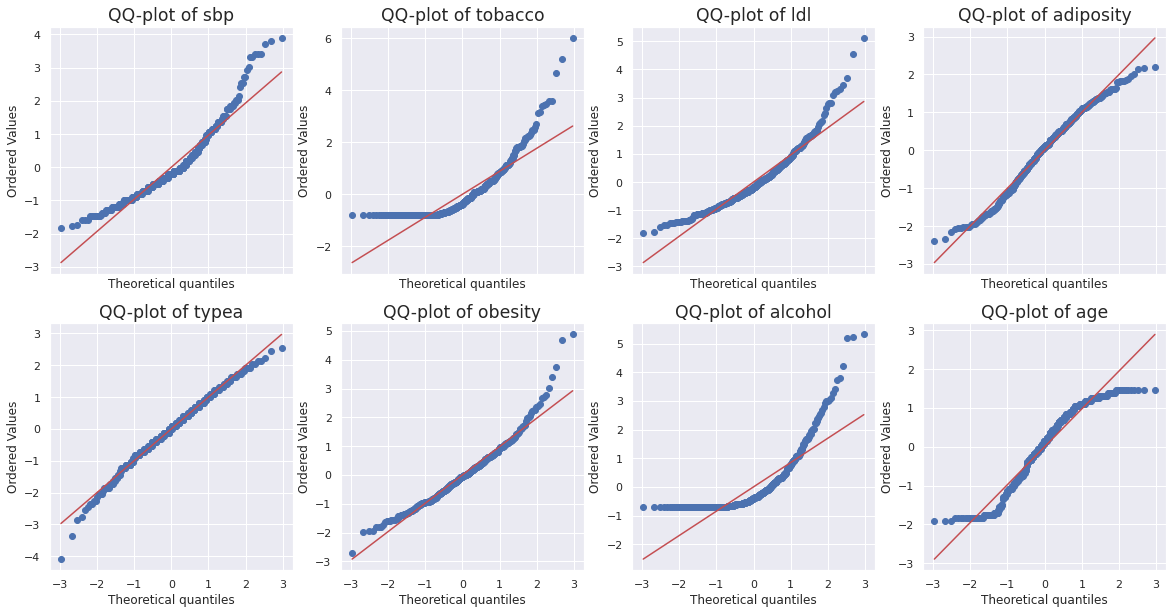

In [15]:
##QQ plot
X_qq = np.delete(X_pre,4,1)
fig, ax = plt.subplots(2,4, figsize=(20, 10), sharex=True)
for j in range(2):
    for i in range(4):
        res=stats.probplot(X_qq[:,i+j*4], plot=ax[j][i], dist="norm")
        ax[j][i].set_title("QQ-plot of {}".format(dataset.drop("famhist",1).columns[i+4*j]),fontsize="x-large")



The figure shows a Quantile-Quantile (QQ) probability plot of the cumulative probability density for the attribute quantiles vs the Normal distribution.  The closer the data points fall on the line with 1-to-1 slope, the closer the attribute follows the Normal distribution. The reason for inspecting the normality of the data is that with a normally distributed predictor variables, the linear combination of these will also be normally distributed, and so we may thus assume that the dependent variable also follow this distribution. On top of that, the result of the normality test in Babic et al., 2017 [3] is not fully reliable for this work because of the technique of oversampling, used to address the problem of imbalanced data.

The attributes `adiposity`, `typea` and `obesity` fall very closely on a straight line, whereas `sbp` and `ldl` have the center of the data following the line closely but the tails deviating a bit more. This indicates that these six attributes are Normally distributed. Tobacco and alcohol consumption seem to be similar to the `sbp` and `ldl` but with more pronounced deviation in the tails. The age attribute, however, seems to deviate from the linear trend
observed in the other eight attributes.


In [16]:
#normality test
normality = pd.DataFrame()
for i in range(9):
    x=stats.shapiro(X_pre[i])
    #df["{}".format(dataset.columns[i])] = pd.Series(x,  index=df.index)
    normality.insert(i,"{}".format(dataset.columns[i]), pd.Series(x))
normality.rename(index={0:'Test_value',1:'p-value'}, inplace=True)
normality.round(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
Test_value,0.911,0.946,0.925,0.927,0.968,0.929,0.953,0.930,0.791
p-value,0.322,0.646,0.436,0.451,0.875,0.475,0.721,0.484,0.016


A Shapiro-Wilk test is performed as shown in the table.

The null hypothesis in this test is that the data is normally distributed. Thus a $p$-value above 0.05 indicates that the null cannot be rejected and we may conclude that normality is present.

The test confirms that the only attribute with $p < 0.05$ is `age`, and thus the null hypothesis is rejected in this case. For the other attributes $p>>0.05$ and thus the null hypothesis cannot be rejected, and we may conclude that the attributes are in fact normally distributed.

However this result is somehow surprising for the variables tobacco and alcool

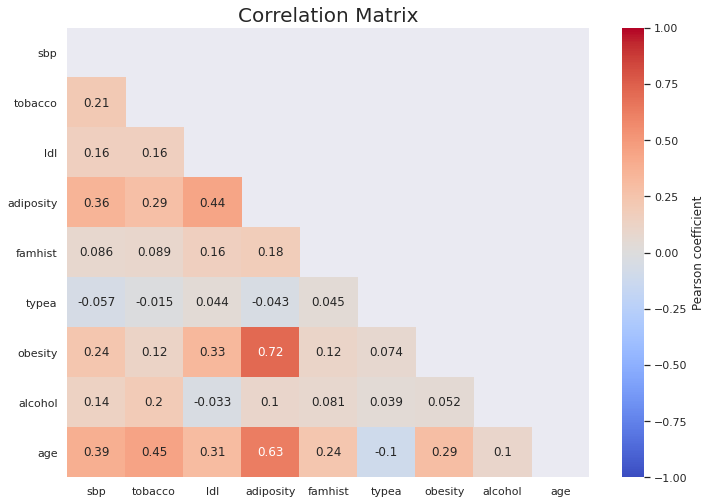

In [17]:
#correlation plots
corr_matrix =np.triu(dataset.corr(method= "pearson").to_numpy()) #maybee drop chd, remember say using spearman in report
a = sns.heatmap(dataset.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=corr_matrix, cbar_kws={'label': 'Pearson coefficient'})
a.set_yticklabels(a.get_yticklabels(), rotation = 0) #horizotal in y
a.set_title("Correlation Matrix", size=20)
a

The correlation matrix for the attributes calculated with the Pearson correlation coefficient. 
The highest positive correlation is with adiposity and age but shows negligible correlation with family history and type A behaviour. Next, tobacco consumption has the highest correlation associated with age. This can, however, be a product of the attribute nature, as cumulative consumption of tobacco may be higher for a subject which is older. The `ldl` cholesterol has the highest correlation with adiposity, obesity and age but again negligible correlation with type A. Also, `ldl` and family history seems to be significantly more correlated than tobacco and blood pressure with `famhist`.

Next it is interesting to note that the overall highest correlation is between adiposity and age and adiposity and obesity, where the latter should not come as a surprise, as adiposity and obesity are both connected with external lipid accumulation.

In [18]:
#feature - target correlation
target_corr = data.corr(method="pearson")["chd"]
target_corr

sbp          0.192354
tobacco      0.299718
ldl          0.263053
adiposity    0.254121
famhist      0.272373
typea        0.103156
obesity      0.100095
alcohol      0.062531
age          0.372973
chd          1.000000
Name: chd, dtype: float64

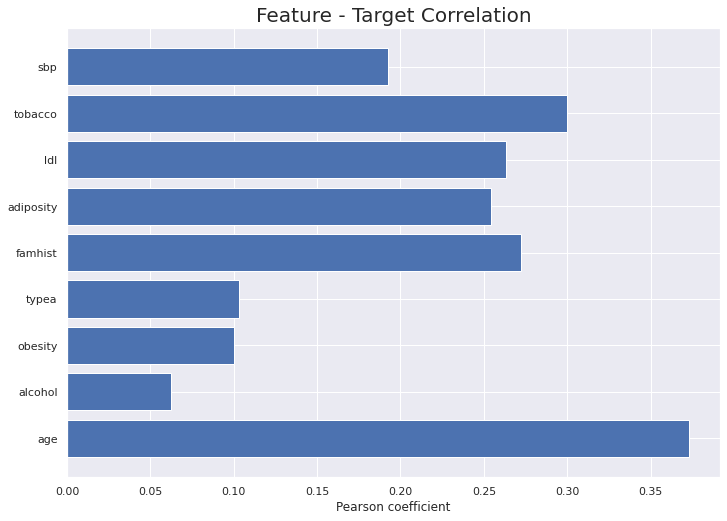

In [19]:
c = plt.barh(data.columns[:-1],target_corr[:-1])
c = plt.xlabel("Pearson coefficient")
c = plt.title("Feature - Target Correlation", size=20)
plt.gca().invert_yaxis() # Flip the y-axis to match the Correlation matrix plot


The figure shows the correlation between the predictor variables and the target or dependent variable `chd`, tobacco consumption and family history display the highest correlation with heart-disease. Blood pressure can then be seen as being relatively intermediately correlated with `chd` and the Type A, obesity and alcohol consumption display the lowest correlation with the response. Here it comes as somewhat a surprise that alcohol consumption and obesity is not highly correlated with heart-disease, as recent studies suggest the opposite.


## PCA

 The aim of the PCA
analysis is to figure out whether the dimensions of the data set can be
reduced by projecting away insignificant PCs. The central part of the
PCA analysis is the Variance Explained, where $\sigma_i^2$ is the
variance of each Principal Component, $V_i$, and the projection of
the data onto the principal components to try to see if the different
attributes show a significant trend with the PCs in question.

The PCA follows a general procedure: Firstly the attributes are centered by subtracting their respective mean. Then the data set is standardized to a unit variance. This is done as the scale of the variables is quite different, resulting in a much higher standard deviation for some of the attributes. Next the Principal Components, $V$, are found via Singular Value Decomposition, where the data matrix $X$ is decomposed into $U \Sigma V^T = X$.


In [20]:
#PCA
pca = decomposition.PCA(n_components=n)
pca.fit(X_pre)
X_pca = pca.transform(X_pre)

#plot objects
pca_set = pd.DataFrame(X_pca)
pca_set = pd.concat([pca_set,target], axis=1)

V = pca.components_
pca_score = pca.explained_variance_ratio_
pca_cumscore = np.cumsum(pca_score)
print(pca_score)
print(pca_cumscore)


[0.32053161 0.13301465 0.11952794 0.10496855 0.09287428 0.08451289
 0.07399469 0.05115082 0.01942456]
[0.32053161 0.45354627 0.5730742  0.67804275 0.77091703 0.85542993
 0.92942462 0.98057544 1.        ]


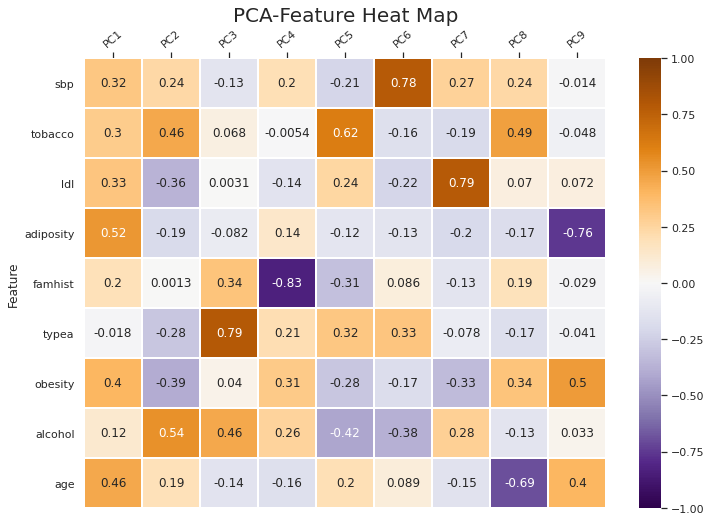

In [21]:
#matrix
xlabel = ["PC{}".format(s) for s in range(1,10)]
#plot

b = sns.heatmap(V.T, annot=True,  vmin=-1, vmax=1, center= 0,  linewidths = 1, linecolor="White", cmap="PuOr_r")
b.set_ylabel("Feature") 
b.set_xticklabels(xlabel, rotation = 40)
b.set_yticklabels(dataset.columns, rotation = 0)
b.xaxis.set_ticks_position('top')
b.set_title("PCA-Feature Heat Map", size=20)
#add title, select cmap

b.figure.savefig("PCA_FeatureHM.png") # This figure also renders like shit on my PC!

The first step in the PCA analysis is to observe their coefficients.
Starting with PC1, all of the attributes excluding `typea` have a positive projection onto this component. Also, the coefficients of PC1 are in a similar range of magnitude, which may indicate that PC1 represents a mean of the variance of the data when there is not a prevalent subset of features that cause a large variation. 

PC2 has positive coefficients for `sbp`, `tobacco`, `alcohol` and `age` but negative for `ldl`, `adiposity`, `typea` and `obesity`, indicating that PC2 represents the contrast between these two sets of attributes.

PC3 is strongly influenced by `typa`, and in small magnitude by `alchol` and
`famhist`, the rest is close to zero.

The remaining PCs are heavily influenced by a single feature, but often a small subset of the remaining independent variables can also be considered as relevant:

-   PC4 leading attribute is `famhist`, with a slight contrast with
    `obesity` and `alchol`.

-   PC5 main factor is `tobacco`, `typea` and `ldl` are positive in
    contrast with the subset of `alchol`, `famhist` and `obesity`.

-   PC6 can be interpreted as `sbp`, with positive projection of `typea`
    and negative one of `alchol`.

-   PC7 similarly to PC6 is dominated by `ldl`, with a positive
    combination of the attributes `alchol` and `sbp` but with negative
    factor `obesity`.

-   PC8 first contribution is given by a negative value of `age`, in
    contrast with a positive contribution from the group composed of
    `tobacco`, `obesity` and `sbp`.

-   PC9 is a contrast between `adiposity` and the combination of
    `obesity` and `age`.




In [22]:
#Biplot inspired by
#https://github.com/ostwalprasad/ostwalprasad.github.io/blob/master/jupyterbooks/2019-01-20-PCA%20using%20python.ipynb
#https://github.com/teddyroland/python-biplot/blob/master/biplot.py

def biplot(data_transf,components,labels=None,comb=12, axes=None):
    comb=str(comb)
    xs=int(comb[0])-1
    ys=int(comb[1])-1
    fig_comb=sns.scatterplot(data_transf[xs],data_transf[ys], data=data_transf, hue=data_transf.columns[-1], s=80, ax=axes)
    if axes != None:
        for i in range(data_transf.shape[1]-1):
            axes.arrow(0, 0, components[xs][i]*data_transf[xs].max(), components[ys][i]*data_transf[ys].max(),color = 'black',alpha = 0.5, head_width=0.1, axes=axes)
            axes.text(components[xs][i]*data_transf[xs].max()* 1.25, components[ys][i]*data_transf[ys].max() * 1.25, labels[i], color = 'black', ha = 'center', va = 'center', fontsize="xx-large", axes=axes)

        axes.set_xlabel("PC{}".format(comb[0]), size=20)
        axes.set_ylabel("PC{}".format(comb[1]), size=20)
        axes.set_title("BiPlot PC{}-PC{}".format(comb[0],comb[1]), size=30)
        axes.set(adjustable='datalim', aspect='equal')
    else:
        for i in range(data_transf.shape[1]-1):
            plt.arrow(0, 0, components[xs][i]*data_transf[xs].max(), components[ys][i]*data_transf[ys].max(),color = 'black',alpha = 0.5, head_width=0.1)
            plt.text(components[xs][i]*data_transf[xs].max()* 1.25, components[ys][i]*data_transf[ys].max() * 1.25, labels[i], color = 'black', ha = 'center', va = 'center', fontsize="xx-large")

        plt.xlabel("PC{}".format(comb[0]), size=20)
        plt.ylabel("PC{}".format(comb[1]), size=20)
        plt.title("BiPlot PC{}-PC{}".format(comb[0],comb[1]), size=30)
    
    return(fig_comb)


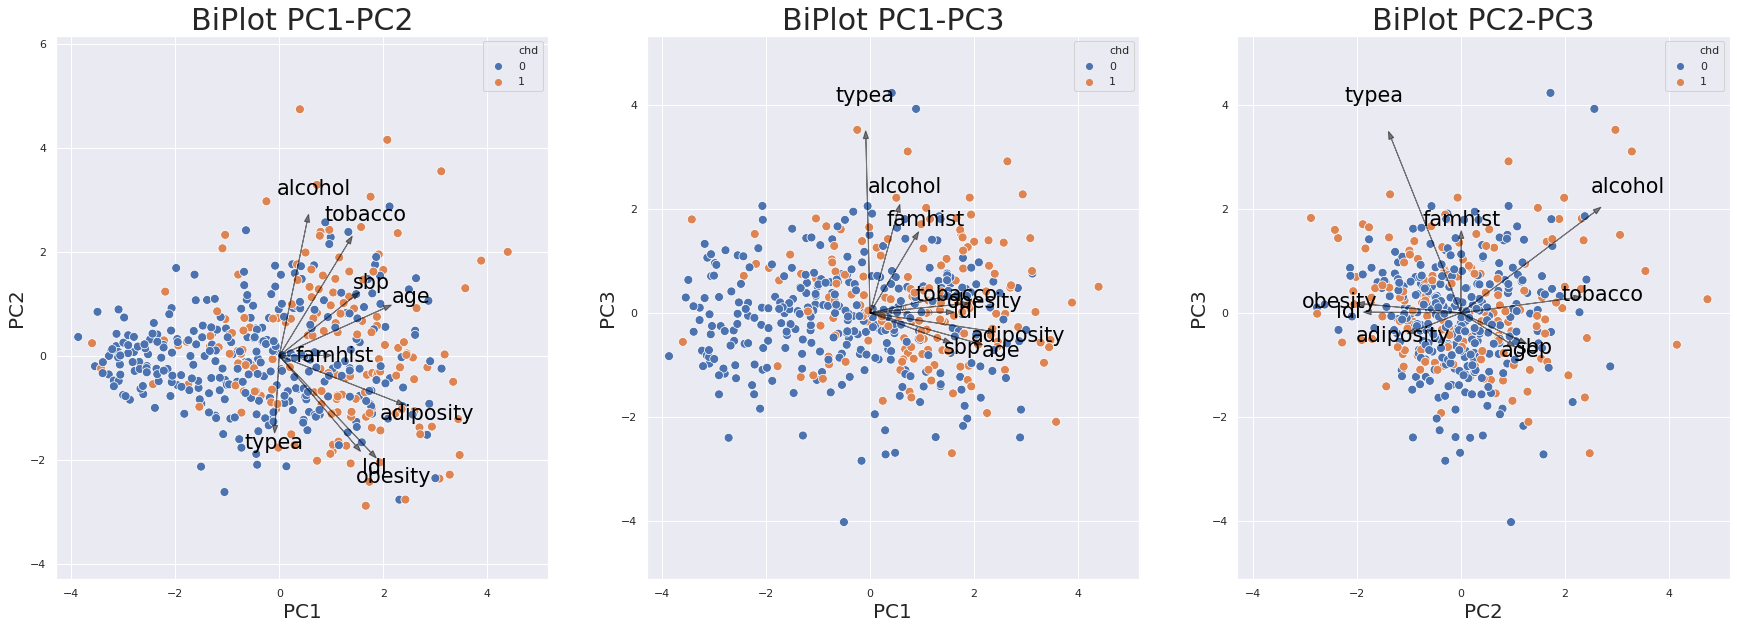

In [23]:
#multiple biplot first 3 component
f, axes = plt.subplots(1, 3, figsize=(30, 10),sharex=True)
f = biplot(pca_set,V,list(dataset.columns),12, axes[0])
f = biplot(pca_set,V,list(dataset.columns),13, axes[1])
f = biplot(pca_set,V,list(dataset.columns),23, axes[2])
f

A visual representation of the above discussed Principal Components can
be seen in this figure, where the data is plotted against them, and
considering all the figures a discrimination analysis is not possible
because the observations from different class overlap and so there is
not clear separation of the subspaces; for every plot there is a
vectorial representation of the attributes against the different PCs.


Text(0.5, 1.0, 'South African Heart-disease: attribute standard deviations')

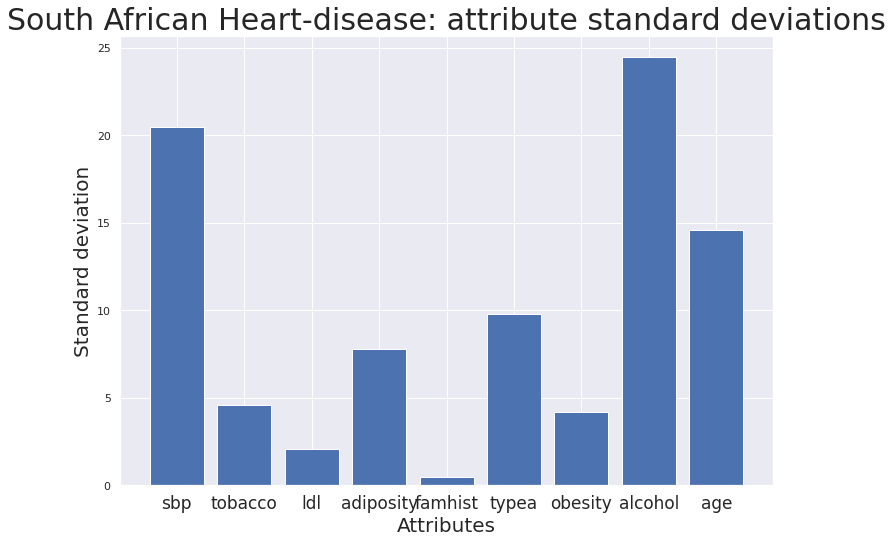

In [24]:
# Plot the variance of each attribute
#first
r = np.arange(1,n+1)
r_2 =np.arange(1,len(pca_score)+1)
thr=90
#first
s = plt.figure()
plt.bar(r, np.std(X,0))
plt.xticks(r, dataset.columns, size=17)
plt.ylabel('Standard deviation',size=20)
plt.xlabel('Attributes',size=20)
plt.title('South African Heart-disease: attribute standard deviations', size=30)


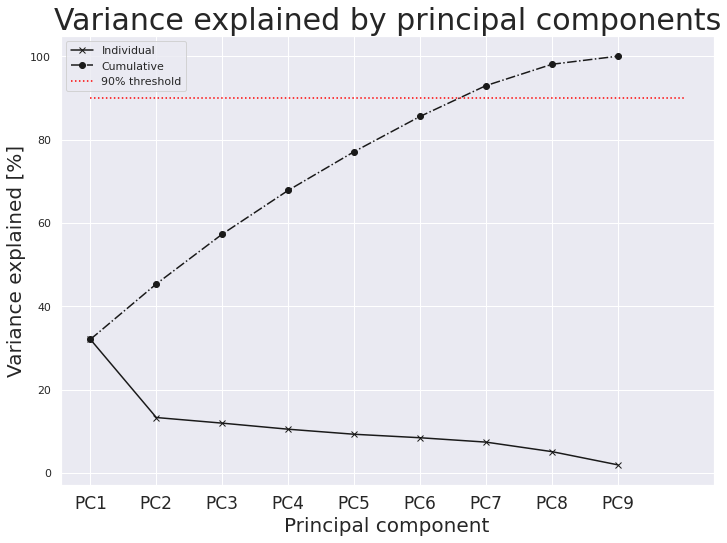

In [25]:
fig = plt.figure()
plt.plot(r_2,pca_score*100,'kx-')
plt.plot(r_2,np.cumsum(pca_score)*100,'ko-.')
plt.plot([1,len(pca_score)+1],[thr, thr],'k:', color="red")
plt.xticks(r_2, labels=xlabel,  size=17)
#plt.set_xticklabels(xlabel, )
plt.title('Variance explained by principal components', size=30);
plt.xlabel('Principal component', size=20);
plt.ylabel("Variance explained [%]",size=20);
plt.legend(['Individual','Cumulative',"{}% threshold".format(thr)])
plt.show()

The combination of the 3 largest Principal Components in terms of explained variance, explain around 57% of the total variance, in fact PC1 account a total of 32%, PC2 13%, and PC3 12%. The PCs from 4 to 7 are in the range of 7-10%; A reasonable percentage of explained variance can be set at 90% and it is possible to see in the above plot that 7 Principal Components are required to pass that threshold and they account 93%. The last 2 represent respectively 5% and 2% of the total variance.

In the light of the above results, the following is an attempt to discuss the possible causes and to elaborate on further tests on the dataset. Starting from the assumption:

-   Normality of the data

-   Linear relationship as the PCA is a linear transformation

-   Influence of the outliers

The Normality assumption is already discussed but it is worth note that
applying the Principal Components Analysis on a categorical variable as
`famhist` is not an optimal solution[4].

In Tibshirani et al., 2009 [6], one of the conclusion about the results of the logistic regression is that not all the features have a perfect linear relationship (quasi-linear), because of the method used to collect the data.

For both this point the solution is to use different technique that can handle mixed data types and non-linearity.

In the following some results about the influence of the outliers are presented: The method used to identify and delete outlier is the Z-scores, using 2 different threshold, respectively 4 and 3, in other words the observation whose distance from the mean is more than 4 (or 3) standard deviation are excluded from the PCA.

In the first case 12 observations are deleted, 4 from `alchol`, 3 from
`tobacco` and the rest are located equally in the attributes
`ldl`,`typea` and `adiposity`; in the second case 44 observation are
considered outlier as the threshold is very strict, 10 for both `alchol`
and `tobacco`, 9 for `sbp`, one more tha `ldl`, the rest are from the
same attributes as before.

There are no relevant changes in the final result.


[0 1 2 5 6 7] [ 9 10  8  2  5 10] 421
[0.34005452 0.12774439 0.11781228 0.10981038 0.08816867 0.08297842
 0.06791374 0.04889835 0.01661925]
[0.34005452 0.46779891 0.58561119 0.69542157 0.78359024 0.86656866
 0.9344824  0.98338075 1.        ]


44

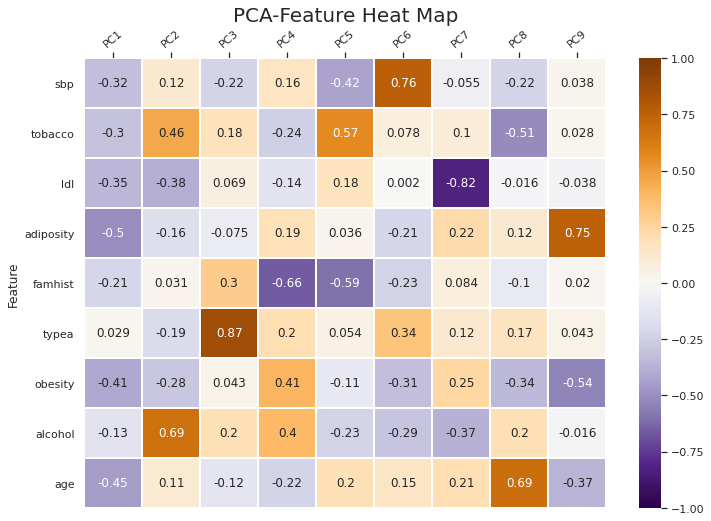

In [26]:
#outliers
z=3

data1=data[(np.abs(stats.zscore(data)) < z).all(axis=1)] #delete all obs with std > 3
outliers = (np.where((np.abs(stats.zscore(data)) > z))) #print row and column where obs have std > 3

target = data1["chd"].copy()
dataset = data1.drop("chd", axis=1).copy()

m,n = dataset.shape
X = dataset.to_numpy().copy()
y = target.to_numpy().copy()

#standardization

#https://stats.stackexchange.com/questions/297975/when-doing-pca-on-binary-variables-should-i-scale-them

scaler = preprocessing.StandardScaler() 
scaler.fit(X) 
X_pre = scaler.transform(X)

pca = decomposition.PCA(n_components=n)
pca.fit(X_pre)
X_pca = pca.transform(X_pre)

#plot objects
pca_set = pd.DataFrame(X_pca)
pca_set = pd.concat([pca_set,target], axis=1)

V = pca.components_
pca_score = pca.explained_variance_ratio_
pca_cumscore = np.cumsum(pca_score)



xlabel = ["PC{}".format(s) for s in range(1,10)]
#plot

b = sns.heatmap(V.T, annot=True,  vmin=-1, vmax=1, center= 0,  linewidths = 1, linecolor="White", cmap="PuOr_r")
b.set_ylabel("Feature") 
b.set_xticklabels(xlabel, rotation = 40)
b.set_yticklabels(dataset.columns, rotation = 0)
b.xaxis.set_ticks_position('top')
b.set_title("PCA-Feature Heat Map", size=20)
#add title, select cmap

b


unique, counts = np.unique(outliers[1], return_counts=True)
print(unique,counts, m)
print(pca_score)
print(pca_cumscore)
sum(counts)

PC1 and PC7 have opposite signs and in PC2 and
PC3 the changes in magnitude are significant. The cumulative explained
variance in percentage for both cases has a positive variation of 1-2%
for the first 3 Principal Components, but the required number to
overcome the 90% threshold is 7, the same as before where the analysis
is performed using the entire dataset.

Considering that different score are found when excluding more than 10% of the total observations, there is some evidence that outliers does not represent an important issue in the dataset in exam.

In summary the Principal Components analysis is ill-suited for the data
set in exam for the goal of data compression, in fact the possible
dimensionality reduction goes from $\mathbb{R}^9 \rightarrow \mathbb{R}^7$ losing around 7% of the information about the variance and transforming the original data set in a new one that has less interpretability.


# References

[1] Rossouw, J., Du Plessis, J., Benadé, A., Jordaan, P., Kotzé, J., Jooste, P., and Ferreira, J. 1983. Coronary risk factor screening in three rural communities. The CORIS baseline study. South African Medical Journal, 64(12), p.430-6, 430-436.

[2] Ruppert, D. 2004. The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Journal of the American Statistical Association, 99(466), p.567-567.

[3] Babic, F., Olejár, J., Pella, Z., and Paralic, J. 2017. Predictive and Descriptive Analysis for Heart Disease Diagnosis., p.155-163.

[4] Gorzalczany, M., and Rudzinski, F. 2017. Heart-Disease Diagnosis Decision Support Employing Fuzzy Systems with Genetically Optimized Accuracy-Interpretability Trade-Off. 2017 Ieee Symposium Series on Computational Intelligence (ssci), p.138-145.

[5] Han, L., Embrechts, M., Szymanski, B., Sternickel, K., and Ross, A. 2006. Random forests feature selection with K-PLS: Detecting ischemia from magnetocardiograms. Esann 2006 Proceedings - European Symposium on Artificial Neural Networks, p.221-226.

[6] Tibshirani, R., Friedman, J., and Hastie, T. 2009. . The elements of statistical learning : data mining, inference, and prediction. Springer.

